In [1]:
import numpy as np
import os
from keras.layers import Dense, GRU, LSTM, CuDNNGRU, CuDNNLSTM, Activation, LSTMCell, GRUCell
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras_tqdm import TQDMNotebookCallback

random_seed = 37
np.random.seed(random_seed)

# Load dataset
PAST_WINDOW_SIZE = 16
FUTURE_WINDOW_SIZE = 0
N_FEATURES = 6
seq_len = PAST_WINDOW_SIZE + FUTURE_WINDOW_SIZE
dataset_filename = f'/home/ICT2000/jondras/datasets/vra1/dataset_{PAST_WINDOW_SIZE}_{FUTURE_WINDOW_SIZE}_{N_FEATURES}.npz'
data = np.load(dataset_filename)
X, y = data['X'], data['y']
print(X.shape, y.shape)


Using TensorFlow backend.


(46808, 16, 6) (46808,)


In [2]:
# Split into train and test partitions
test_size = 0.25

# Not stratified split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed, shuffle=False)
# print(f'Train examples per class: {np.unique(y_train, return_counts=True)}')
# print(f'Test examples per class: {np.unique(y_test, return_counts=True)}')
# Train examples per class: (array([0, 1]), array([17621, 17485]))
# Test examples per class: (array([0, 1]), array([5783, 5919]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed, stratify=y)
print(f'Train examples per class: {np.unique(y_train, return_counts=True)}')
print(f'Test examples per class: {np.unique(y_test, return_counts=True)}')
# Train examples per class: (array([0, 1]), array([17553, 17553]))
# Test examples per class: (array([0, 1]), array([5851, 5851]))


Train examples per class: (array([0, 1]), array([17553, 17553]))
Test examples per class: (array([0, 1]), array([5851, 5851]))


In [3]:
# Model
# model = Sequential()
# model.add(CuDNNGRU(20, input_shape = (seq_len, N_FEATURES), return_sequences=True))
# model.add(CuDNNGRU(1, return_sequences = False))
# model.add(Activation('sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# print(model.summary())

model = Sequential()
model.add(CuDNNGRU(20, input_shape = (seq_len, N_FEATURES), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnngru_1 (CuDNNGRU)       (None, 20)                1680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# Train
# model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=0, callbacks=[TQDMNotebookCallback()])

n_epochs = 50
batch_size = 32

# Checkpoint model weights and the model itself: at each epoch
model_checkpoint_path_prefix = f'./checkpoints/x20U_{PAST_WINDOW_SIZE}_{FUTURE_WINDOW_SIZE}_{N_FEATURES}/'
if not os.path.exists(model_checkpoint_path_prefix):
    os.makedirs(model_checkpoint_path_prefix)
model_checkpoint_name = 'm_{epoch:04d}_{loss:.4f}_{val_loss:.4f}.hdf5'
model_checkpoint = ModelCheckpoint(model_checkpoint_path_prefix + model_checkpoint_name, monitor='val_loss', verbose=1, 
                                   save_best_only=True, save_weights_only=False, mode='auto', period=1)

X_val = X_test
y_val = y_test
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=n_epochs, verbose=1, 
                 callbacks=[model_checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 35106 samples, validate on 11702 samples
Epoch 1/50


UnknownError: Fail to find the dnn implementation.
	 [[{{node cu_dnngru_1/CudnnRNN}}]]
	 [[{{node loss/mul}}]]

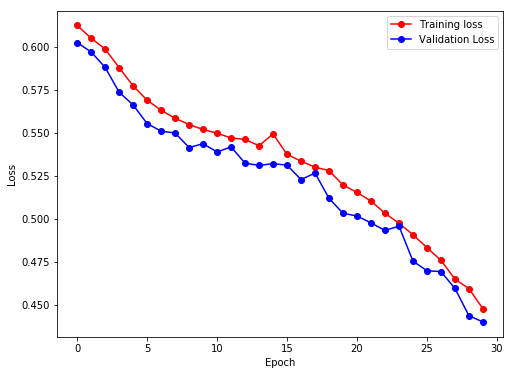

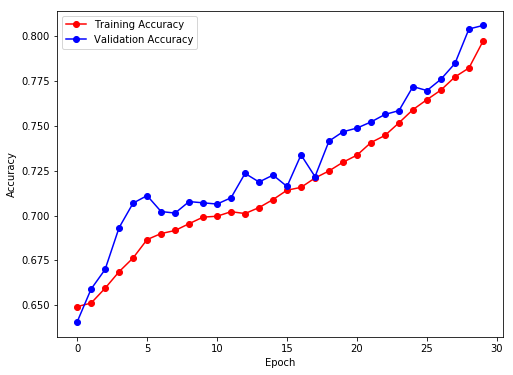

In [7]:
from matplotlib import pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],'ro-')#,linewidth=2.0)
plt.plot(hist.history['val_loss'],'bo-')#,linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'])#,fontsize=18)
# plt.xticks(x, x)
plt.xlabel('Epoch')#,fontsize=16)
plt.ylabel('Loss')#,fontsize=16)
# plt.ylim(0.35, 0.95)
# plt.title('Loss Curves',fontsize=16)
plt.show()

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'ro-')#,linewidth=2.0)
plt.plot(hist.history['val_acc'],'bo-')#,linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])#,fontsize=18)
# plt.xticks(x, x)
plt.xlabel('Epoch')#,fontsize=16)
plt.ylabel('Accuracy')#,fontsize=16)
# plt.title('Accuracy Curves',fontsize=16)
# plt.ylim(0.35, 0.95)
plt.show()

# simple 1 layer GRU, 20 units, 6 features, 16 past window size

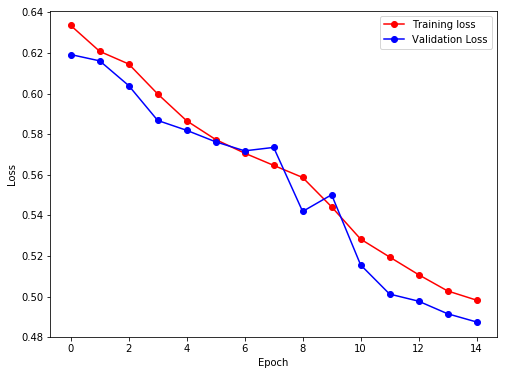

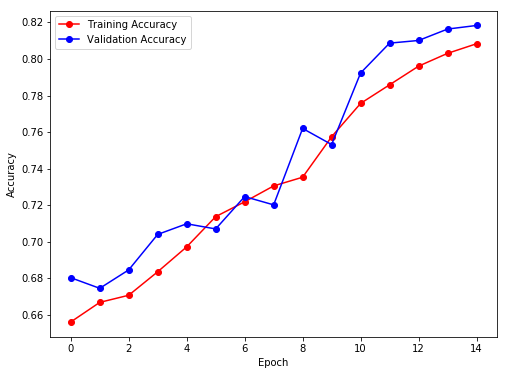

In [36]:
from matplotlib import pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],'ro-')#,linewidth=2.0)
plt.plot(hist.history['val_loss'],'bo-')#,linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'])#,fontsize=18)
# plt.xticks(x, x)
plt.xlabel('Epoch')#,fontsize=16)
plt.ylabel('Loss')#,fontsize=16)
# plt.ylim(0.35, 0.95)
# plt.title('Loss Curves',fontsize=16)
plt.show()

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'ro-')#,linewidth=2.0)
plt.plot(hist.history['val_acc'],'bo-')#,linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])#,fontsize=18)
# plt.xticks(x, x)
plt.xlabel('Epoch')#,fontsize=16)
plt.ylabel('Accuracy')#,fontsize=16)
# plt.title('Accuracy Curves',fontsize=16)
# plt.ylim(0.35, 0.95)
plt.show()


# 1 layer 20 GRUs, 6 features, >81% accuracy. after 15 epochs


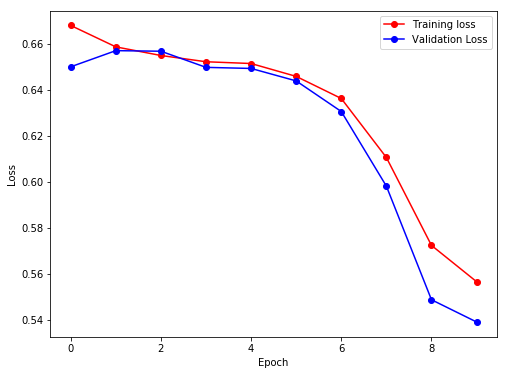

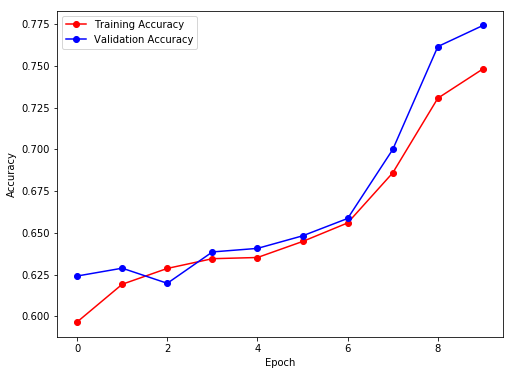

In [30]:
from matplotlib import pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],'ro-')#,linewidth=2.0)
plt.plot(hist.history['val_loss'],'bo-')#,linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'])#,fontsize=18)
# plt.xticks(x, x)
plt.xlabel('Epoch')#,fontsize=16)
plt.ylabel('Loss')#,fontsize=16)
# plt.ylim(0.35, 0.95)
# plt.title('Loss Curves',fontsize=16)
plt.show()

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'ro-')#,linewidth=2.0)
plt.plot(hist.history['val_acc'],'bo-')#,linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])#,fontsize=18)
# plt.xticks(x, x)
plt.xlabel('Epoch')#,fontsize=16)
plt.ylabel('Accuracy')#,fontsize=16)
# plt.title('Accuracy Curves',fontsize=16)
# plt.ylim(0.35, 0.95)
plt.show()


# 1 layer 20 GRUs, 12 features, 77.43% accuracy. after 10 epochs


In [8]:
# Evaluate
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

11702/11702 [==============================] - 4s 361us/step
Accuracy: 80.61%


In [ ]:
1 layer 20 GRUs, 12 features, 77.43% accuracy. after 10 epochs

10 GRUs worse, 100 GRUs 50% only